# Copernicus Atmosphere using ECMWFSearch plugin

In this tutorial we will show you how to use eodag to download data from providers using [ECMWFSearch](../../plugins_reference/generated/eodag.plugins.search.build_search_result.ECMWFSearch.rst) `eodag` plugin. You can currently find three providers that uses it, `cop_ads`, `cop_cds` and `cop_ewds`. For this tutorial we will use `cop_ads`, but `cop_cds` and `cop_ewds` are used the same way.

In [5]:
from eodag import EODataAccessGateway, setup_logging

setup_logging(1)  # 0: nothing, 1: only progress bars, 2: INFO, 3: DEBUG
dag = EODataAccessGateway()
dag.set_preferred_provider("cop_ads")

## Search (build download request)

There are two use cases, a search for a product already configured in EODAG, or a search for a dataset not already configured, where you will have a little more to do.

We can add a `variable` (Temperature, `temperature`) and one `model_level` to the request because `CAMS_EAC4` is configured to request for some pre-configured values. Check the dataset available values to make your selection.

> Note: specifying your own variables will completely overwrite default values configured for `CAMS_EAC4` collection.

### Check available queryables and default values:

Available queryables parameters and associated values can be checked using [list_queryables()](../api_user_guide/4_queryables.ipynb) method, or through [cop_ads](https://ads-beta.atmosphere.copernicus.eu/datasets/cams-global-reanalysis-eac4?tab=download) or [cop_cds](https://cds-beta.climate.copernicus.eu/datasets) websites:

In [6]:
queryables = dag.list_queryables(provider="cop_ads", productType="CAMS_EAC4")
queryables

QueryablesDict (8) - additional_properties=False
"FieldInfo(annotation=NoneType, required=True, title='Variable', description='Please, consult the product user guide in the documentation section for more information on these variables.')"
"list[typing.Literal['1', '10', '100', '1000', '150', '2', '20', '200', '250', '3', '30', '300', '400', '5', '50', '500', '600', '7', '70', '700', '800', '850', '900', '925', '950']],"
"FieldInfo(annotation=NoneType, required=False, default=None, title='Pressure level')"
"list[typing.Literal['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '7', '8', '9']],"
"FieldInfo(annotation=NoneType, required=False, default=None, title='Model level', description=""Model level 1 is the top of the atmosphere. Model level 60 is the Earth's surface."")"
"list[typing.Literal['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']],"
"FieldInfo(annotation=NoneType, required=True, title='Time', description='Model base time as HH:MM (UTC)')"
"typing.Literal['grib', 'netcdf_zip'],"
"FieldInfo(annotation=NoneType, required=False, default=None, title='Data format', description='Please select a format for the data files, the native format of MARS dataset is GRIB.')"
"str,"


In [7]:
queryables['ecmwf:variable']

typing.Annotated[list[typing.Literal['10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature', '2m_temperature', 'acetone', 'acetone_product', 'aldehydes', 'amine', 'ammonia', 'ammonium', 'black_carbon_aerosol_optical_depth_550nm', 'carbon_monoxide', 'dimethyl_sulfide', 'dinitrogen_pentoxide', 'dust_aerosol_0.03-0.55um_mixing_ratio', 'dust_aerosol_0.55-0.9um_mixing_ratio', 'dust_aerosol_0.9-20um_mixing_ratio', 'dust_aerosol_optical_depth_550nm', 'ethane', 'ethanol', 'ethene', 'formaldehyde', 'formic_acid', 'fraction_of_cloud_cover', 'geopotential', 'high_cloud_cover', 'high_vegetation_cover', 'hydrogen_peroxide', 'hydroperoxy_radical', 'hydrophilic_black_carbon_aerosol_mixing_ratio', 'hydrophilic_organic_matter_aerosol_mixing_ratio', 'hydrophobic_black_carbon_aerosol_mixing_ratio', 'hydrophobic_organic_matter_aerosol_mixing_ratio', 'hydroxyl_radical', 'isoprene', 'lake_cover', 'land_sea_mask', 'lead', 'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegeta

Here we can see the list of available values for `variable` and that it's a required parameter.

### Search from an existing collection:

In [8]:
# Request for all parameters
products_from_product_type = dag.search(
    start="2021-01-01",
    end="2021-01-02",
    productType="CAMS_EAC4",
    variable="temperature",
    time="00:00",
    count=True
)
print(
    "%s product built %s,\n having variable = %s\n"
    % (
        products_from_product_type.number_matched,
        products_from_product_type[0],
        products_from_product_type[0].properties.get("ecmwf:variable"),
    )
)
# Request for temperature on one model level
products_from_product_type = dag.search(
    start="2021-01-01",
    end="2021-01-02",
    productType="CAMS_EAC4",
    count=True,
    **{"ecmwf:variable": ["temperature"],
       "ecmwf:model_level": ["1"],
       "ecmwf:time": ["00:00"],
       "ecmwf:data_format": "grib"},

)
print(
    "%s product built %s,\n having variable = %s\n"
    % (
        products_from_product_type.number_matched,
        products_from_product_type[0],
        products_from_product_type[0].properties.get("ecmwf:variable"),
    )
)

1 product built EOProduct(id=CAMS_EAC4_ORDERABLE_f1f5bfef0b462aea81370ab20f0bf3b356fc93fb, provider=cop_ads),
 having variable = temperature

1 product built EOProduct(id=CAMS_EAC4_ORDERABLE_245d95e7d751fac902fe4c40ea65035dc6fcee8c, provider=cop_ads),
 having variable = ['temperature']



### Search using a custom request:

Here we will use a set of custom parameters corresponding to `CAMS_EAC4`, which should result to the same request sent to ads.

In [9]:
ads_req_params = {
    "productType": "CAMS_EAC4",
    "ecmwf:variable": ["temperature"],
    "ecmwf:model_level": ["1"],
    "ecmwf:time": ["00:00"],
    "ecmwf:data_format": "grib",
}

products_from_ads_req = dag.search(
    provider="cop_ads",
    start="2021-01-01",
    end="2021-01-02",
    **ads_req_params,
)

# orderLink property must be the same with the two request methods,
# as they are built from the same ADS request arguments
if (
    products_from_ads_req[0].properties["orderLink"]
    == products_from_product_type[0].properties["orderLink"]
):
    print(
        "Request using productType or directly ADS parameters result to the\n",
        "same orderLink %s"
        % (
            products_from_ads_req[0].properties["orderLink"],
        )
    )

Request using productType or directly ADS parameters result to the
 same orderLink https://ads.atmosphere.copernicus.eu/api/retrieve/v1/processes/cams-global-reanalysis-eac4/execution?{"inputs": {"data_format": "grib", "date": "2021-01-01/2021-01-02", "model_level": ["1"], "time": ["00:00"], "variable": ["temperature"]}}


### Send product retrieval request, download when available and return an `xarray.DataArray`

- download performed using ADS credentials set in `~/.config/eodag/eodag.yml` as for other EO providers:
```yaml
    cop_ads:
        priority:
        download:
            output_dir: /my/path/to/data/eodag_data
        auth:
            credentials:
                apikey: myapikey
```
- you can check your request status from https://ads.atmosphere.copernicus.eu/requests?tab=all
- See [support](https://ads.atmosphere.copernicus.eu/help) for any problem related to the provider

In [6]:
# Get XarrayDict
xd = products_from_ads_req[0].to_xarray()
xd

0.00B [00:00, ?B/s]

XarrayDict (1)


In [7]:
# DataArray from XarrayDict first value
da = next(iter(xd.values())).t
da

<xarray.DataArray 't' (time: 2, latitude: 241, longitude: 480)> Size: 925kB
[231360 values with dtype=float32]
Coordinates:
  * time        (time) datetime64[ns] 16B 2021-01-01 2021-01-02
    step        timedelta64[ns] 8B ...
    hybrid      float64 8B ...
  * latitude    (latitude) float64 2kB 90.0 89.25 88.5 ... -88.5 -89.25 -90.0
  * longitude   (longitude) float64 4kB 0.0 0.75 1.5 2.25 ... 357.8 358.5 359.2
    valid_time  (time) datetime64[ns] 16B ...
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      115680
    GRIB_typeOfLevel:                         hybrid
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

## Plot using cartopy

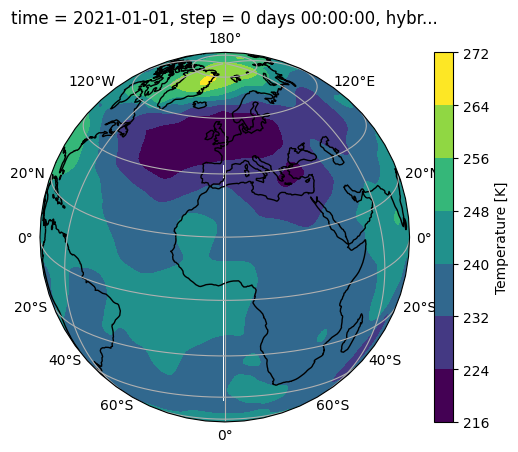

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.Orthographic(0, 20))
ax.coastlines()
ax.gridlines(draw_labels=True)
da[0].plot.contourf(ax=ax, transform=ccrs.PlateCarree())